# Problem 1:

In [1]:
import time
from math import sin
import numpy as np
import matplotlib.pyplot as plt 
import numpy.polynomial.polynomial as poly
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Create X matrix
def createX(n, degree, x, y):
    onesArr = np.ones((n, 1))
    x = x.reshape(n, 1)
    for degree in range(1, degree+1):
        if degree == 1:
            X = np.hstack((onesArr, x))
        else:
            X = np.hstack((X, x**degree))
    return X

# Calculate parameters beta
def calBeta(X, y):
    X_TX = np.matmul(np.transpose(X), X)
    X_TX_inv = np.linalg.pinv(X_TX)
    X_Ty = np.matmul(np.transpose(X), y)
    beta = np.matmul(X_TX_inv, X_Ty)
    return beta

In [3]:
# Initialize f(x)
f_x = np.zeros((1))
f_x = np.delete(f_x, 0, axis=0)
numOfSamples = 51

# Generate x values
x = np.linspace(0, 1 , numOfSamples)

# Compute f(x)
for xval in x:
    f_temp = 1 + 2*sin(5*xval) - sin(15*xval)
    f_x = np.hstack((f_x, f_temp))
    
# Generate gaussian distribution with mean=0 and var=1
e = np.random.normal(0, 1, numOfSamples)

# Generate y values for the x values
y = f_x + e

# Generate X matrix
X = createX(numOfSamples, 100, x, y)

# Estimate the coefficients
beta = calBeta(X, y)

# Find predicted values of y based on estimated coefficients beta
y_pred = np.matmul(X, beta)

# prediction with numpy function
# coefs = poly.polyfit(x, y, 11)
# ffit = poly.polyval(x, coefs)

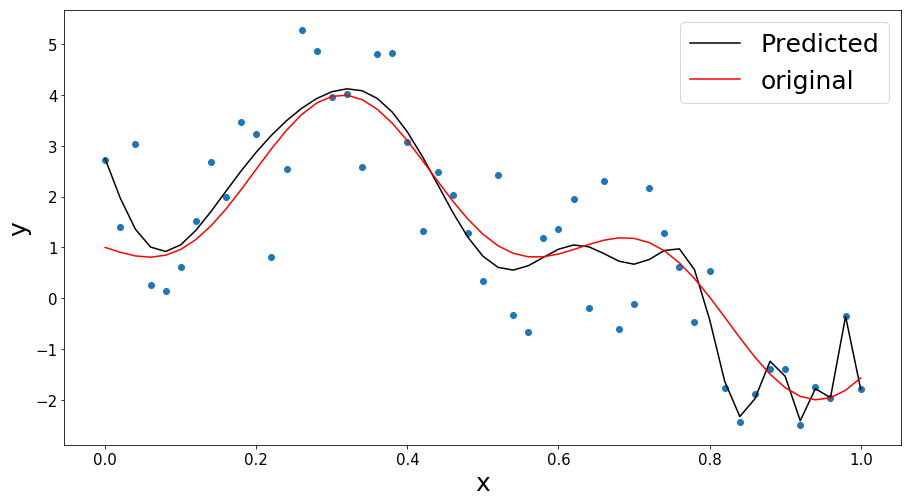

In [4]:
# Plots
fig, ax = plt.subplots(figsize=(15, 8))
params = {'legend.fontsize': 25}
plt.rcParams.update(params)
# Plot original data
plt.scatter(x, y)
# plot predicted data from polynomial regression
plt.plot(x, y_pred, 'black', label='Predicted')
# Plot function f(x)
plt.plot(x, f_x, 'red', label='original')
# Plot from numpy function for polynomial regression
# plt.plot(x, ffit, 'g')
# plot labels
plt.xlabel('x', size=25)
plt.ylabel('y', size=25)

plt.legend(loc="best")

# Define ticks
# ax.xaxis.set_major_locator(plt.MultipleLocator(1))
# ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))

# increse font size of ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

# Problem 2

In [5]:
# Prediction using perceptron 
def perceptPredict(X, theta):
    summation = np.dot(X, theta[1:]) + theta[0]
    if summation > 0:
        prediction = 1
    else:
        prediction = -1           
    return prediction

# Train with perceptron algorithm
def perceptTrain(theta, X, y, iterations, learningRate):
    for _ in range(iterations):
        for idx in range(np.size(y)):
            # preddict y label
            y_pred = perceptPredict(X[idx], theta)
            # learn and update the theta
            theta[1:] += np.multiply((learningRate * (y[idx] - y_pred)), X[idx])
            theta[0] += learningRate * (y[idx] - y_pred)
    return theta

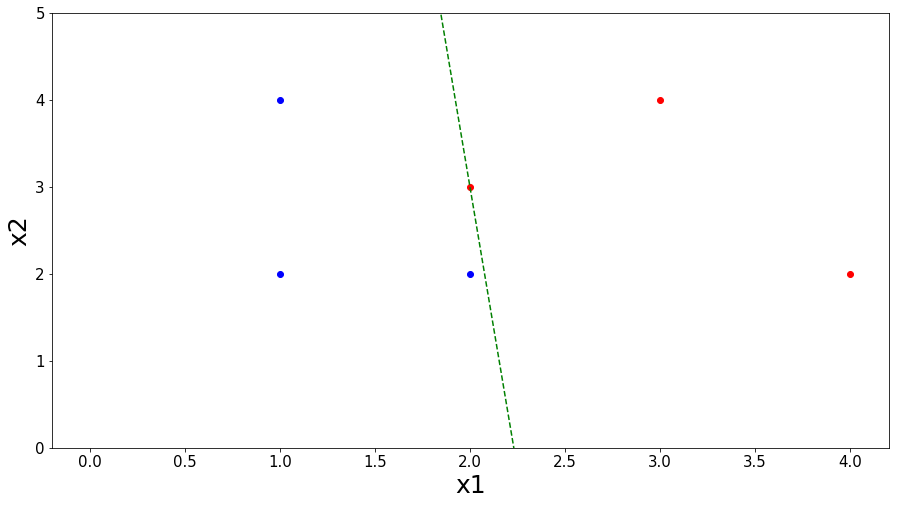

In [6]:
# Generate the given training data
trainingData = []
trainingData.append(np.array([1, 2]))
trainingData.append(np.array([1, 4]))
trainingData.append(np.array([2, 2]))
trainingData.append(np.array([4, 2]))
trainingData.append(np.array([3, 4]))
trainingData.append(np.array([2, 3]))

# Output label
y = np.array([1, 1, 1, -1, -1, -1])

# Define the parameters
theta = np.zeros((3))
iterations = 100
learningRate = 0.1

# Train data
thetaUpdated = perceptTrain(theta, trainingData, y, iterations, learningRate)

# Calculate boundary line
x = np.linspace(0, 4, 10)
bias = thetaUpdated[0]
m = -(thetaUpdated[1]/thetaUpdated[2])
c = -(bias/thetaUpdated[2])
y = m*x + c

# Predict data
yPred = np.zeros((1), dtype=int)
yPred = np.delete(yPred, 0, axis=0)

# Plots
fig, ax = plt.subplots(figsize=(15, 8))
params = {'legend.fontsize': 25}
plt.rcParams.update(params)

for idx in range(len(trainingData)):
    prediction = perceptPredict(trainingData[idx], theta)
    yPred = np.hstack((yPred, prediction))
    col = np.where(prediction == 1, 'blue', 'red')
    plt.scatter(trainingData[idx][0], trainingData[idx][1], color=f'{col}')
    
plt.plot(x, y, 'g--')
plt.ylim(0, 5)
plt.xlabel('x1', size=25)
plt.ylabel('x2', size=25)

# increse font size of ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

# Problem 3

In [7]:
def trainAndTestSplit(spamEmails, notSpamEmails):
    # convert data into numpy arrays
    spamEmailsArr = spamEmails.to_numpy()
    notSpamEmailsArr = notSpamEmails.to_numpy()    
    # Calculate number of total spam and not spam emails
    totalSpam = spamEmails.shape[0]
    totalNotSpam = notSpamEmails.shape[0]    
    # Calculate number of spam and not spam train and test
    numSpamTrain = int(np.floor((2/3) * totalSpam))
    numNotSpamTrain = int(np.floor((2/3) * totalNotSpam))
    numSpamTest = totalSpam - numSpamTrain
    numNotSpamTest = totalNotSpam - numNotSpamTrain 
    print(numSpamTrain, numSpamTest, numNotSpamTrain, numNotSpamTest)
    # Seperate spam and not spam train and test arrays
    trainSpam = spamEmailsArr[0: numSpamTrain, :]
    trainNotSpam = notSpamEmailsArr[0: numNotSpamTrain, :]
    testSpam = spamEmailsArr[numSpamTrain:numSpamTrain+numSpamTest, :]
    testNotSpam = notSpamEmailsArr[numNotSpamTrain:numNotSpamTrain+numNotSpamTest, :]
    print(np.shape(trainSpam), np.shape(trainNotSpam))
    # Combine test and train data
    trainData = np.vstack((trainSpam, trainNotSpam))
    testData = np.vstack((testSpam, testNotSpam))
    return trainData, testData

# sigmoid function (hypthesis function h(x))
def sigmoid(X, theta):
    z = np.dot(X, theta)
    return 1 / (1 + np.exp(-z))

# Computes the cost function for all the training samples
def calCost(h, y):
    cost = (-y * np.log(h) - (1-y)*np.log(1-h))
    return np.mean(cost)

# Computes the gradient of the cost function at the point theta
def calGradient(X, h, y):
    m = X.shape[0]
    return np.dot(X.T, (h - y)) / m

def updateWeights(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

In [12]:
# read data from the file
spamBaseData = pd.read_csv("spambase/spambase.data", header=None)

# Extract label y 
y = spamBaseData.iloc[:, -1]

# filter spam
spamEmails = spamBaseData.loc[y == 1]
# filtet not spam
notSpamEmails = spamBaseData.loc[y == 0]

# split the train and test data
[trainData, testData] = trainAndTestSplit(spamEmails, notSpamEmails)

# seperate X and y of training and test data
Xtrain = trainData[:, 0:-1]
ytrain = trainData[:, -1]
Xtest = testData[:, 0:-1]
ytest = testData[:, -1]

# Add bias to Xtrain matrix
intercept = np.ones((Xtrain.shape[0], 1)) 
Xtrain = np.concatenate((intercept, Xtrain), axis=1)

1208 605 1858 930
(1208, 58) (1858, 58)


In [13]:
startTime = np.round(time.time(), decimals=4)

iterations = 100000
learningRate = 0.5

theta = np.zeros(Xtrain.shape[1])

for i in range(iterations):
    h = sigmoid(Xtrain, theta)
    gradient = calGradient(Xtrain, h, ytrain)
    theta = updateWeights(theta, learningRate, gradient)

stopTime = np.round(time.time(), decimals=4)
# print(stopTime)
totalTime = np.round((stopTime - startTime), decimals=4)
print(f'Leraning rate: {learningRate}')
print(f'Number of Iterations: {iterations}')
print(f'Training time: {totalTime} seconds')

/home/vishaldeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp


Leraning rate: 0.5
Number of Iterations: 100000
Training time: 12.5996 seconds


In [14]:
# Test Data
intercept = np.ones((Xtest.shape[0], 1)) 
Xtest = np.concatenate((intercept, Xtest), axis=1)
predicted = (sigmoid(Xtest, theta)).astype(int)
ytest = ytest.astype(int)

/home/vishaldeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp


In [15]:
# Performance calculations
perfArr = np.equal(predicted, ytest)
print(np.size(perfArr))
accuracy = (np.sum(perfArr)/np.size(perfArr)) * 100
print(accuracy)

1535
83.257328990228
